# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train an agent using DDPG to solve unity environment.

### Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
%matplotlib inline

from ddpg_agent import Agent

### Instantiate the Environment and Agent

In [2]:

env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
States have length: 33


In [3]:
agent = Agent(state_size=33, action_size=4, random_seed=1)

### Train the DDPG Agent

In [6]:
def ddpg(n_episodes=10000, max_t=5000, print_every=100):
    
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents) 
        
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            if np.any(dones):
                break 
                
        scores_deque.append(scores)
        scores.append(score)
       
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque) > 30:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100,
                                                                                         np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores



c:\users\42952\appdata\local\continuum\anaconda3\envs\drnld\lib\site-packages\torch\nn\functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 2.35
Episode 200	Average Score: 5.74
Episode 300	Average Score: 8.55
Episode 400	Average Score: 10.14
Episode 500	Average Score: 12.04
Episode 600	Average Score: 13.29
Episode 700	Average Score: 14.14
Episode 800	Average Score: 15.05
Episode 900	Average Score: 16.13
Episode 1000	Average Score: 17.27
Episode 1100	Average Score: 18.31
Episode 1200	Average Score: 19.19
Episode 1300	Average Score: 20.09
Episode 1400	Average Score: 20.96
Episode 1500	Average Score: 21.79
Episode 1600	Average Score: 22.45
Episode 1700	Average Score: 23.13
Episode 1800	Average Score: 23.80
Episode 1900	Average Score: 24.43
Episode 2000	Average Score: 24.99
Episode 2100	Average Score: 25.49
Episode 2200	Average Score: 25.98
Episode 2300	Average Score: 26.42
Episode 2400	Average Score: 26.83
Episode 2500	Average Score: 27.17
Episode 2600	Average Score: 27.52
Episode 2700	Average Score: 27.76
Episode 2800	Average Score: 27.99
Episode 2900	Average Score: 28.33
Episode 3000	Average Score

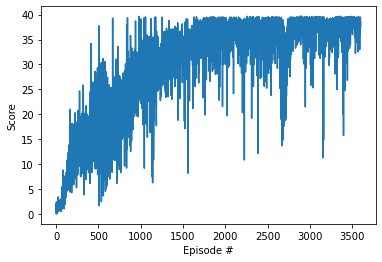

In [7]:
scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()